In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import load_model
from keras.layers import Dropout,Conv1D, MaxPooling1D, Flatten,TimeDistributed,Bidirectional
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler

def import_data_from_csv(path: str):
    """
    Imports data from a csv file and returns a pandas dataframe.
    """
    return pd.read_csv(path)


In [3]:
data = import_data_from_csv("..\..\data\processed\AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-07,0.060659,0.060747,0.060606,0.060918,0.051639,0.165833
1,2011-01-08,0.061014,0.061031,0.060954,0.061217,0.051892,0.000000
2,2011-01-09,0.061271,0.061314,0.061273,0.061507,0.052138,0.000000
3,2011-01-10,0.061600,0.061598,0.061576,0.061799,0.052386,0.238469
4,2011-01-11,0.061825,0.061863,0.061810,0.062097,0.052638,0.236102


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4736 non-null   object 
 1   Open       4736 non-null   float64
 2   High       4736 non-null   float64
 3   Low        4736 non-null   float64
 4   Close      4736 non-null   float64
 5   Adj Close  4736 non-null   float64
 6   Volume     4736 non-null   float64
dtypes: float64(6), object(1)
memory usage: 259.1+ KB


,Open,High,Low,Close,Adj Close,Volume
count,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000
mean,0.323525,0.325077,0.322057,0.323695,0.313271,0.078671
std,0.281754,0.283311,0.280437,0.282041,0.284488,0.099601
min,0.058919,0.059167,0.058167,0.058613,0.049685,0.000000
25%,0.115543,0.115810,0.115002,0.115337,0.099745,0.000000
50%,0.191892,0.192267,0.191342,0.192069,0.181261,0.049917
75%,0.589665,0.593123,0.581471,0.588200,0.577403,0.104114
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

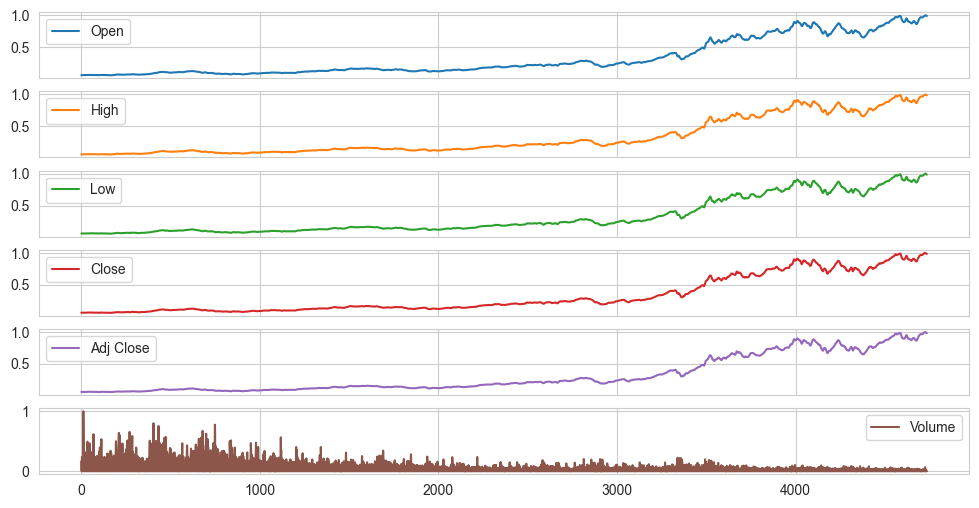

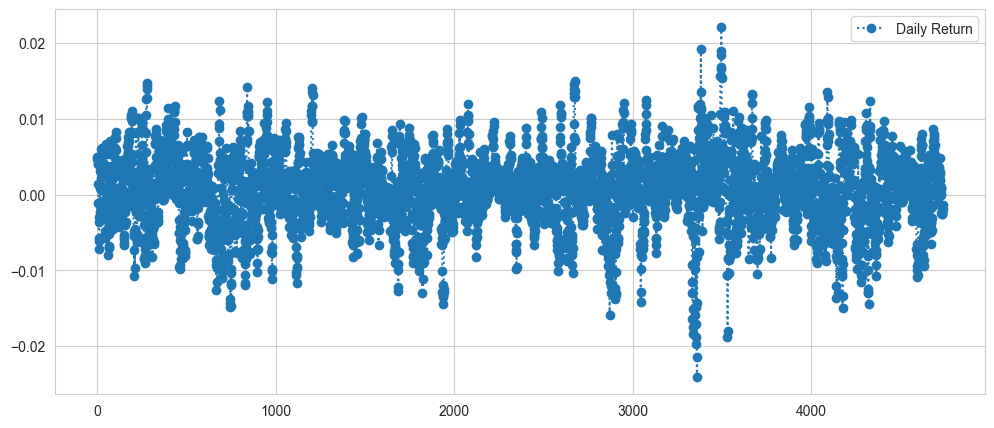

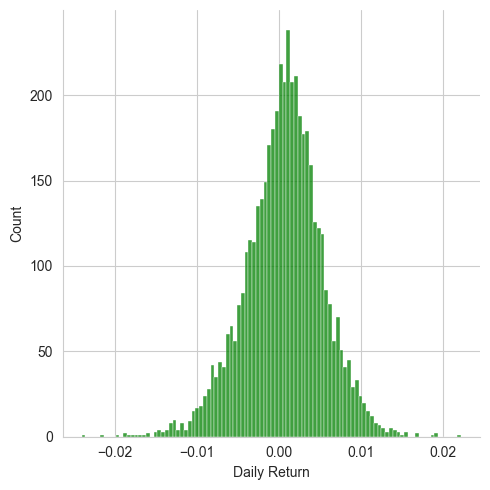

            Date      Open      High       Low     Close  Adj Close    Volume  \
0     2011-01-07  0.060659  0.060747  0.060606  0.060918   0.051639  0.165833   
1     2011-01-08  0.061014  0.061031  0.060954  0.061217   0.051892  0.000000   
2     2011-01-09  0.061271  0.061314  0.061273  0.061507   0.052138  0.000000   
3     2011-01-10  0.061600  0.061598  0.061576  0.061799   0.052386  0.238469   
4     2011-01-11  0.061825  0.061863  0.061810  0.062097   0.052638  0.236102   
...          ...       ...       ...       ...       ...        ...       ...   
4731  2023-12-21  0.995743  0.992825  0.992542  0.990492   0.990492  0.024712   
4732  2023-12-22  0.993529  0.990293  0.990174  0.987940   0.987940  0.019736   
4733  2023-12-23  0.991497  0.988536  0.988300  0.986393   0.986393  0.000000   
4734  2023-12-24  0.990356  0.987250  0.986755  0.984496   0.984496  0.000000   
4735  2023-12-25  0.988662  0.985408  0.984994  0.983197   0.983197  0.000000   

      MA for 10 days  MA fo

Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
MA for 10 days      9
MA for 50 days     49
MA for 100 days    99
Daily Return        1
dtype: int64

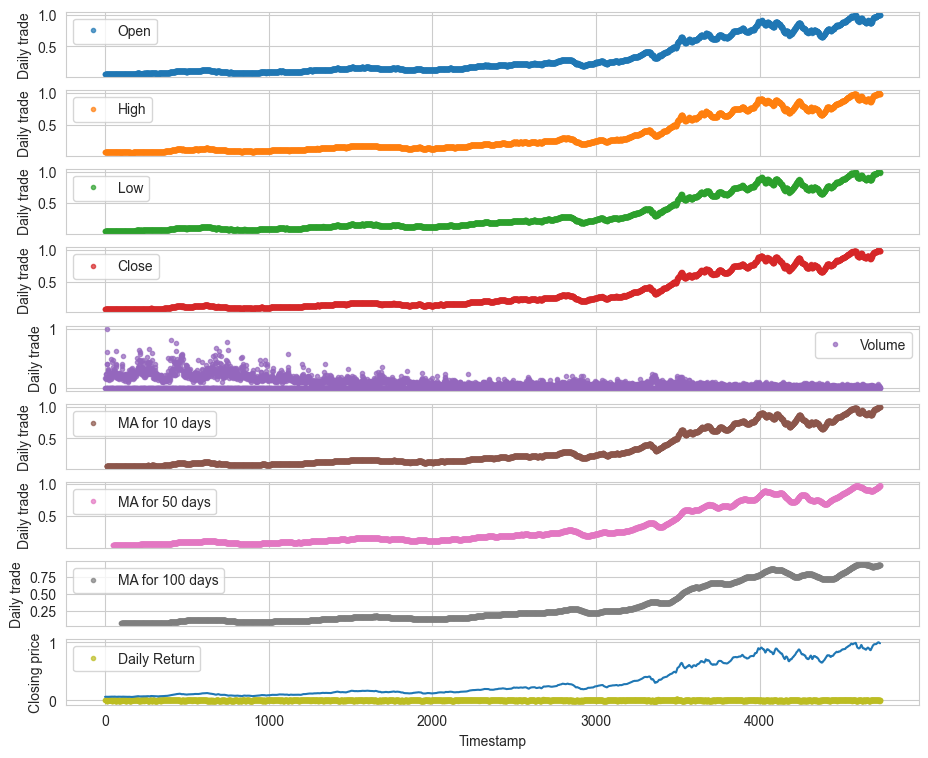

In [6]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

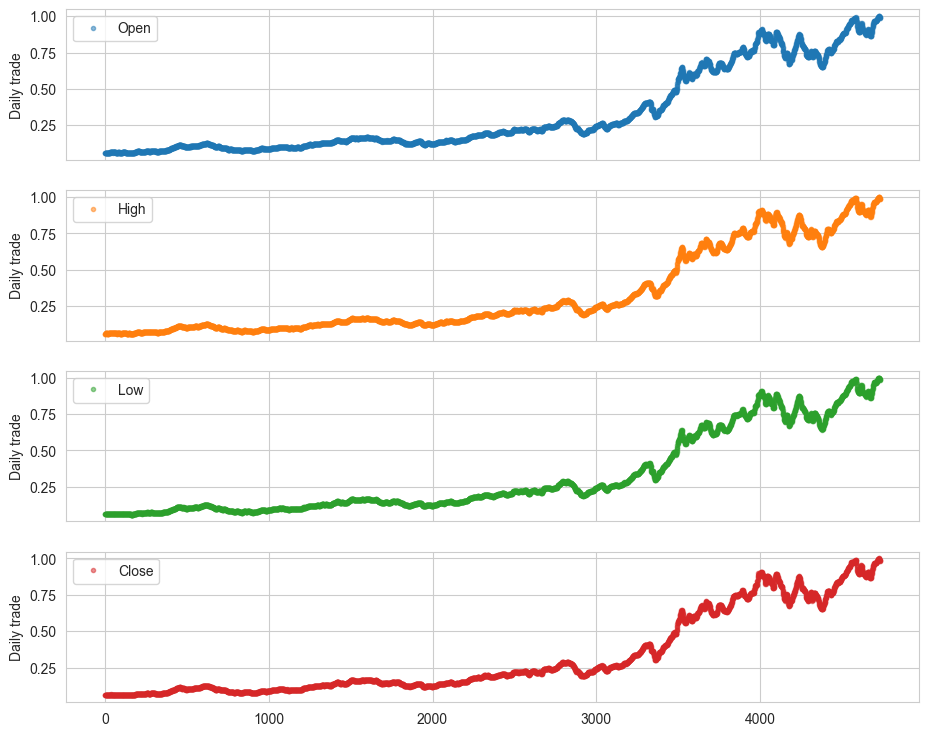

In [7]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date      Open      High       Low     Close  Adj Close    Volume  \
0     2011-01-07  0.060659  0.060747  0.060606  0.060918   0.051639  0.165833   
1     2011-01-08  0.061014  0.061031  0.060954  0.061217   0.051892  0.000000   
2     2011-01-09  0.061271  0.061314  0.061273  0.061507   0.052138  0.000000   
3     2011-01-10  0.061600  0.061598  0.061576  0.061799   0.052386  0.238469   
4     2011-01-11  0.061825  0.061863  0.061810  0.062097   0.052638  0.236102   
...          ...       ...       ...       ...       ...        ...       ...   
4731  2023-12-21  0.995743  0.992825  0.992542  0.990492   0.990492  0.024712   
4732  2023-12-22  0.993529  0.990293  0.990174  0.987940   0.987940  0.019736   
4733  2023-12-23  0.991497  0.988536  0.988300  0.986393   0.986393  0.000000   
4734  2023-12-24  0.990356  0.987250  0.986755  0.984496   0.984496  0.000000   
4735  2023-12-25  0.988662  0.985408  0.984994  0.983197   0.983197  0.000000   

      MA for 10 days  MA fo

,count,mean,std,min,25%,50%,75%,max
Open,4736.0,0.323525,0.281754,0.058919,0.115543,0.191892,0.589665,1.000000
High,4736.0,0.325077,0.283311,0.059167,0.115810,0.192267,0.593123,1.000000
Low,4736.0,0.322057,0.280437,0.058167,0.115002,0.191342,0.581471,1.000000
Close,4736.0,0.323695,0.282041,0.058613,0.115337,0.192069,0.588200,1.000000
Adj Close,4736.0,0.313271,0.284488,0.049685,0.099745,0.181261,0.577403,1.000000
Volume,4736.0,0.078671,0.099601,0.000000,0.000000,0.049917,0.104114,1.000000
MA for 10 days,4727.0,0.323312,0.281399,0.058775,0.115815,0.192294,0.587733,0.997351
MA for 50 days,4687.0,0.321617,0.278342,0.060564,0.115846,0.191347,0.588176,0.971277
MA for 100 days,4637.0,0.319763,0.275095,0.061443,0.115594,0.191765,0.572971,0.943118
Daily Return,4735.0,0.000599,0.004727,-0.024034,-0.002190,0.000827,0.003525,0.022158


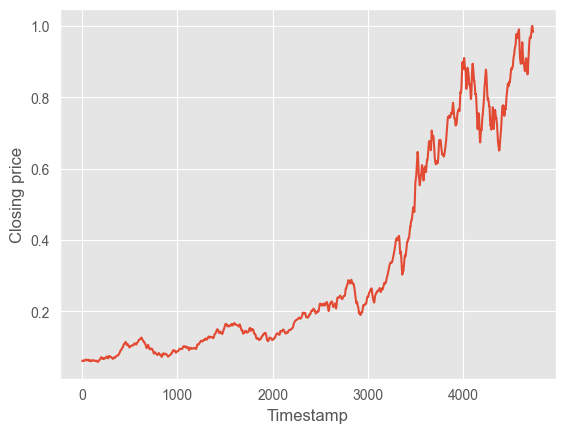

In [13]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [35]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
train_X_values = []
test_X_values = []
train_Y_values = []
test_Y_values = []

num_splits = 5
split_size = len(X) / num_splits
print(split_size)
X_splits = [X[int(i * split_size):int((i + 1) * split_size)] for i in range(num_splits)]
Y_splits = [Y[int(i * split_size):int((i + 1) * split_size)] for i in range(num_splits)]

    
for i in range(num_splits):
    x_train, x_test, y_train, y_test = train_test_split(X_splits[i], Y_splits[i], test_size=0.2, shuffle=True)
    train_X = np.array(x_train)
    test_X = np.array(x_test)
    train_Y = np.array(y_train)
    test_Y = np.array(y_test)
    
    train_X = train_X.reshape(train_X.shape[0],1,100,1)
    test_X = test_X.reshape(test_X.shape[0],1,100,1)
    print("***********")
    print(len(train_X))
    print(len(test_X))
    
    train_X_values.append(train_X)
    test_X_values.append(test_X)
    train_Y_values.append(train_Y)
    test_Y_values.append(test_Y)


print("-------------------")
print(len(train_X_values))
print(len(test_X_values))

926.8
***********
740
186
***********
741
186
***********
741
186
***********
741
186
***********
741
186
-------------------
5
5


Epoch 1/20
19/19 [==============================] - 9s 99ms/step - loss: 0.0177 - mse: 0.0177 - mae: 0.0990 - val_loss: 0.0064 - val_mse: 0.0064 - val_mae: 0.0639
Epoch 2/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0576 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0563
Epoch 3/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0504 - val_loss: 0.0028 - val_mse: 0.0028 - val_mae: 0.0435
Epoch 4/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0488 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0477
Epoch 5/20
19/19 [==============================] - 0s 17ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0437 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0409
Epoch 6/20
19/19 [==============================] - 0s 16ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0415 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0368
Epoch 7/20
19/19 [====

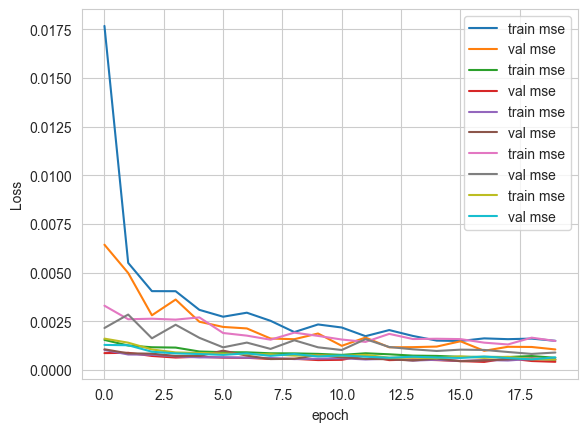

In [38]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

for i in range(len(train_X_values)):
    history = model.fit(train_X_values[i], train_Y_values[i], validation_data=(test_X_values[i],test_Y_values[i]), epochs=20,batch_size=40, verbose=1, shuffle =True)
    plt.plot(history.history['mse'], label='train mse')
    plt.plot(history.history['val_mse'], label='val mse')
    plt.xlabel("epoch")
    plt.ylabel("Loss")
    plt.legend()

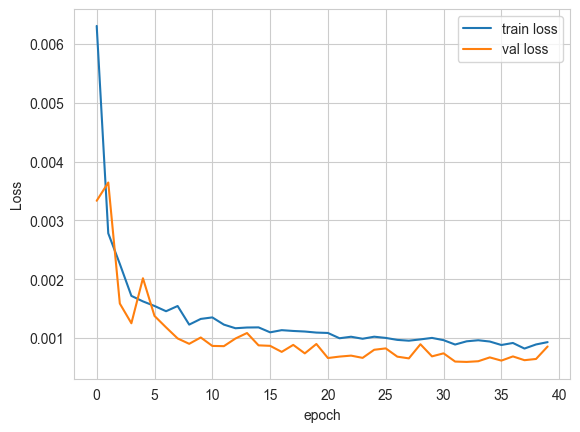

In [11]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

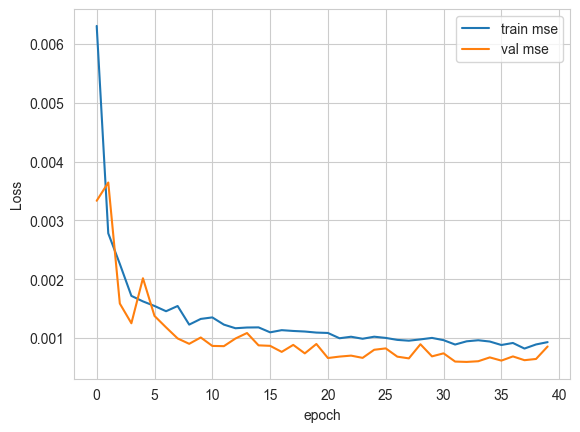

In [12]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

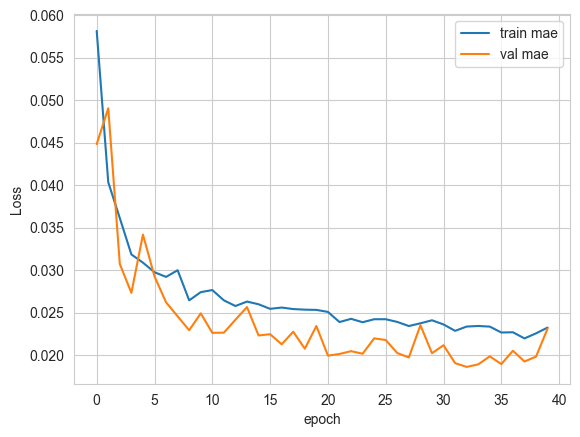

In [13]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [14]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [15]:
model.evaluate(test_X, test_Y)

29/29 [==============================] - 0s 6ms/step - loss: 8.5735e-04 - mse: 8.5735e-04 - mae: 0.0231


[0.0008573514060117304, 0.0008573514060117304, 0.023136727511882782]

In [16]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.970556
R2 Score: 0.970556
Max Error: 0.110105


29/29 [==============================] - 0s 5ms/step


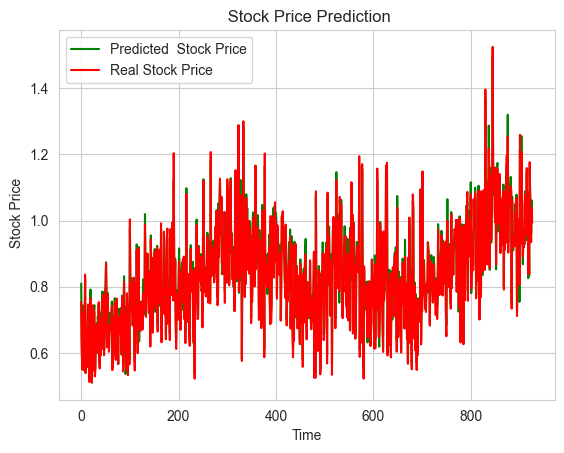

In [17]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [18]:

# First we need to save a model
model.save("cnn-lstm.keras")

In [19]:
# Load model
new_model = tf.keras.models.load_model("cnn-lstm.keras")

In [20]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

Loading data ...
Analyse data ...
Predicting ...
145/145 [==============================] - 1s 6ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0280
3707
4634
145/145 [==============================] - 1s 6ms/step
4634


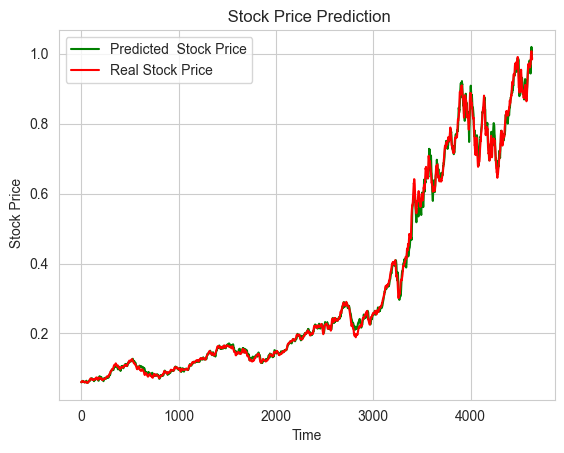

In [87]:
print("Loading data ...")
data2 = import_data_from_csv("..\..\data\processed\AAPL.csv")
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
# data2.head()

data2.reset_index(drop=True, inplace=True)
# data2.head()
df2 = data2.drop('Date', axis=1)
# print(df2)

X = []
Y = []
print("Analyse data ...")
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

# train_X = np.array(x_train)
# test_X = np.array(x_test)
# train_Y = np.array(y_train)
# test_Y = np.array(y_test)

test_X = np.array(X)
test_Y = np.array(Y)

test_X = test_X.reshape(test_X.shape[0],1,100,1)

print("Predicting ...")
model.evaluate(test_X, test_Y)

print(len(train_X))
print(len(test_X))
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(test_X)
print(len_t)
for j in range(len_t):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()